# K-Nearest Neighbors (KNN) Algorithm

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.


In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import math as m
import operator

# Importing the Dataset
Import from /datasets/shipping.csv

In [5]:
# Read from the csv file
data = pd.read_csv('datasets/shipping.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Data Preprocessing
1. Check for missing values
2. Check for categorical data

In [6]:
# Check for missing values
print("Missing values in the dataset\n")
print(data.isnull().sum(), "\n\n")

# Check for the unique values in the columns
print("Unique values in the dataset")
print(data.nunique())


Missing values in the dataset

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64 


Unique values in the dataset
ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64


In [7]:

# Print data type
print("Data type of the columns")
print(data.dtypes)

Data type of the columns
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [8]:
# View dimensions of dataset
print("Dimensions of the dataset")
print(data.shape)

# Print the columns
print("Columns in the dataset")
print(data.columns)

Dimensions of the dataset
(10999, 12)
Columns in the dataset
Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [9]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
print("Mode_of_Shipment unique values")
data['Mode_of_Shipment'].unique()


Mode_of_Shipment unique values


array(['Flight', 'Ship', 'Road'], dtype=object)

In [11]:
print(("Warehouse_block unique values"))
data['Warehouse_block'].unique()

Warehouse_block unique values


array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [12]:
print("Product_importance unique values")
data['Product_importance'].unique()

Product_importance unique values


array(['low', 'medium', 'high'], dtype=object)

In [13]:
# Drop ID column
data.drop('ID', axis=1, inplace=True)

data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [14]:
# View Sumary Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [15]:
# Frequence distribution of values in variables

for var in data.columns:
    print(data[var].value_counts(), "\n")

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64 

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64 

Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64 

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64 

Cost_of_the_Product
245    110
257    109
260    106
254    101
264    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: count, Length: 215, dtype: int64 

Prior_purchases
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: count, dtype: int64 

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64 

Gender
F    5545
M    5454
Name: count, dtype: int64 

Discount_offered
10    860
2     858
6     849
9     845
3     840
     ... 
65     36
26     36
42     35
25     34
30     34
Name: count, Length: 65, d

In [16]:
# Convert Warehouse_block to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


data['Warehouse_block_Encoded'] = label_encoder.fit_transform(data['Warehouse_block'])

# Convert Mode_of_Shipment to numerical

data['Mode_of_Shipment_Encoded'] = label_encoder.fit_transform(data['Mode_of_Shipment'])

# Convert Product_importance to numerical
data['Product_importance_Encoded'] = label_encoder.fit_transform(data['Product_importance'])

data['Gender_Encoded'] = label_encoder.fit_transform(data['Gender'])

data.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_Encoded,Mode_of_Shipment_Encoded,Product_importance_Encoded,Gender_Encoded
0,D,Flight,4,2,177,3,low,F,44,1233,1,3,0,1,0
1,F,Flight,4,5,216,2,low,M,59,3088,1,4,0,1,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,0,0,1,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,1,0,2,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1,2,0,2,0


In [17]:
# Check missing values

data.isnull().sum()

Warehouse_block               0
Mode_of_Shipment              0
Customer_care_calls           0
Customer_rating               0
Cost_of_the_Product           0
Prior_purchases               0
Product_importance            0
Gender                        0
Discount_offered              0
Weight_in_gms                 0
Reached.on.Time_Y.N           0
Warehouse_block_Encoded       0
Mode_of_Shipment_Encoded      0
Product_importance_Encoded    0
Gender_Encoded                0
dtype: int64

# Data Visualization

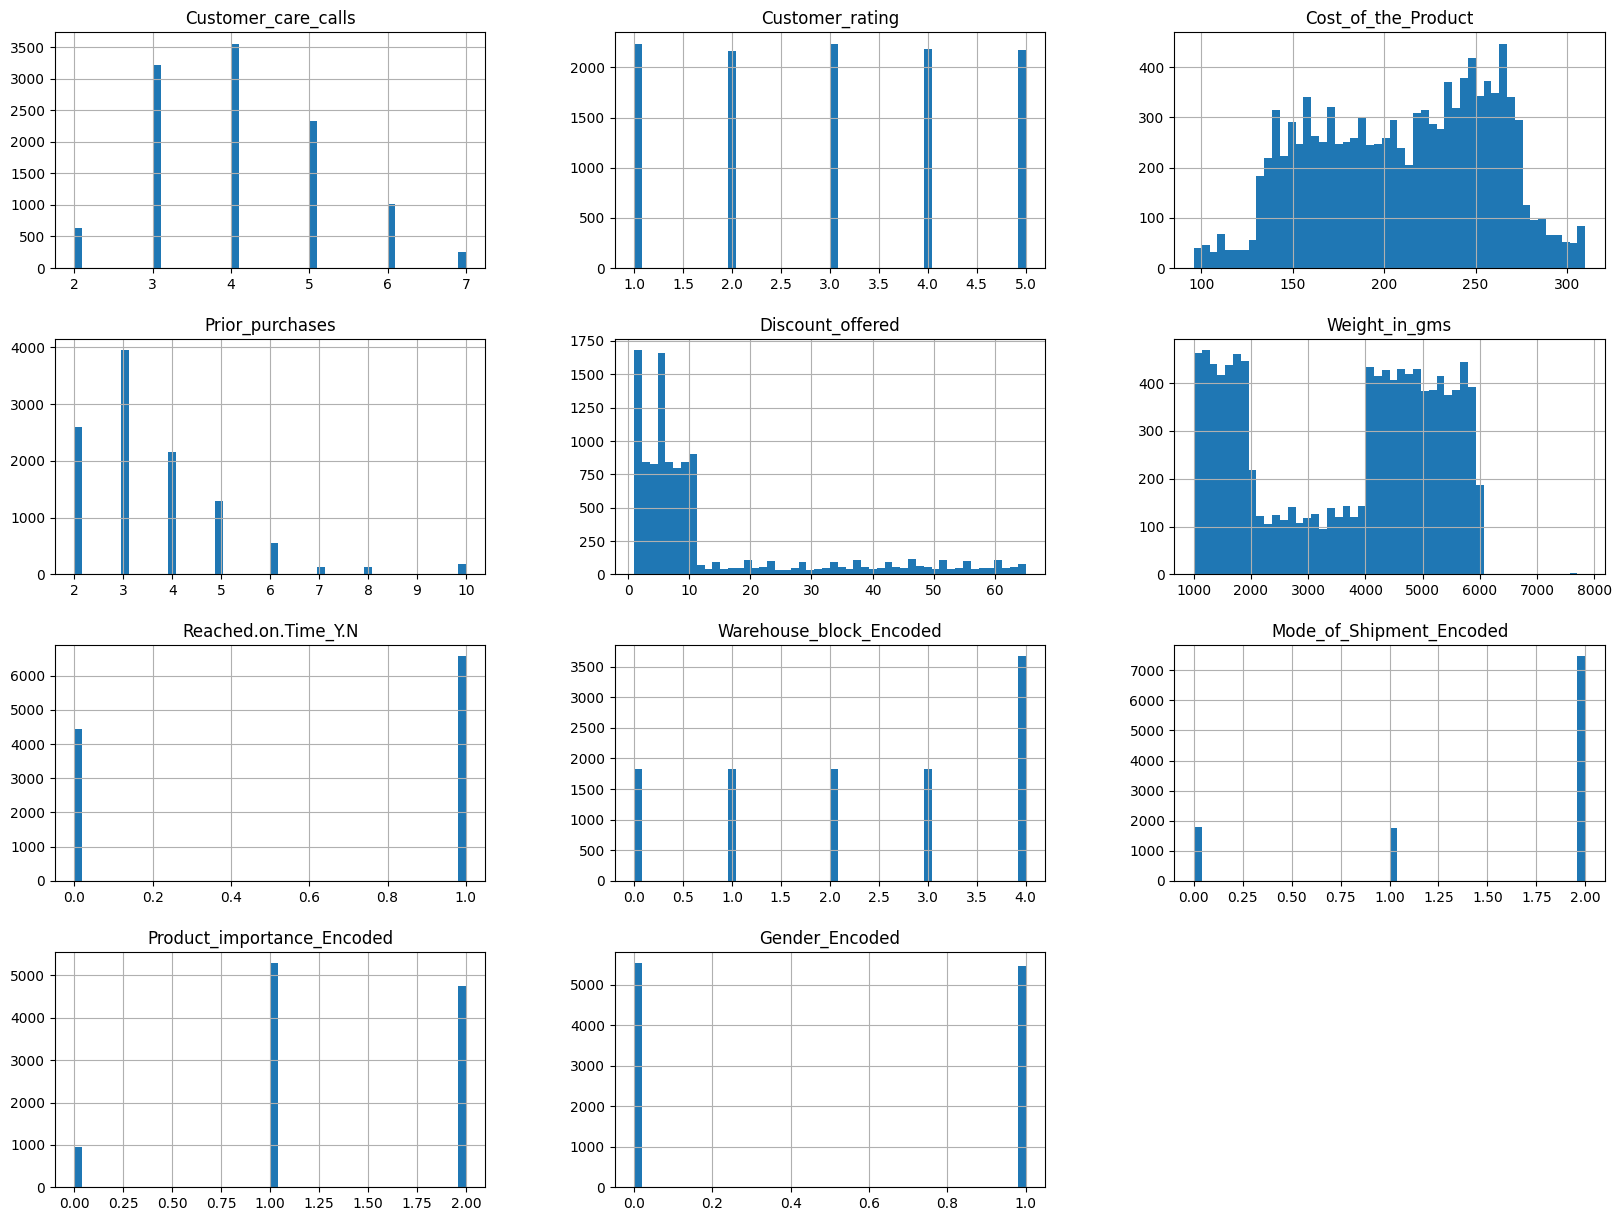

In [18]:
# Visualize the data
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20, 15))
plt.show()



# Multivariate Plots

In [19]:
data = data.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)

correlation = data.corr()
correlation

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_Encoded,Mode_of_Shipment_Encoded,Product_importance_Encoded,Gender_Encoded
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126,0.014496,-0.020164,0.006273,0.002545
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119,0.010169,0.001679,0.003157,0.002775
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587,-0.006679,0.006681,0.006366,0.019759
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515,-0.005262,-0.001640,0.003662,-0.009395
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108,0.009569,0.009364,-0.006251,-0.011777
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793,0.004086,-0.000797,0.001652,0.003573
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000,0.005214,-0.000535,-0.023483,0.004689
Warehouse_block_Encoded,0.014496,0.010169,-0.006679,-0.005262,0.009569,0.004086,0.005214,1.000000,0.000617,0.004260,-0.003700
Mode_of_Shipment_Encoded,-0.020164,0.001679,0.006681,-0.001640,0.009364,-0.000797,-0.000535,0.000617,1.000000,0.004911,-0.011288
Product_importance_Encoded,0.006273,0.003157,0.006366,0.003662,-0.006251,0.001652,-0.023483,0.004260,0.004911,1.000000,-0.009865


In [20]:
correlation['Mode_of_Shipment_Encoded'].sort_values(ascending=False)

Mode_of_Shipment_Encoded      1.000000
Discount_offered              0.009364
Cost_of_the_Product           0.006681
Product_importance_Encoded    0.004911
Customer_rating               0.001679
Warehouse_block_Encoded       0.000617
Reached.on.Time_Y.N          -0.000535
Weight_in_gms                -0.000797
Prior_purchases              -0.001640
Gender_Encoded               -0.011288
Customer_care_calls          -0.020164
Name: Mode_of_Shipment_Encoded, dtype: float64

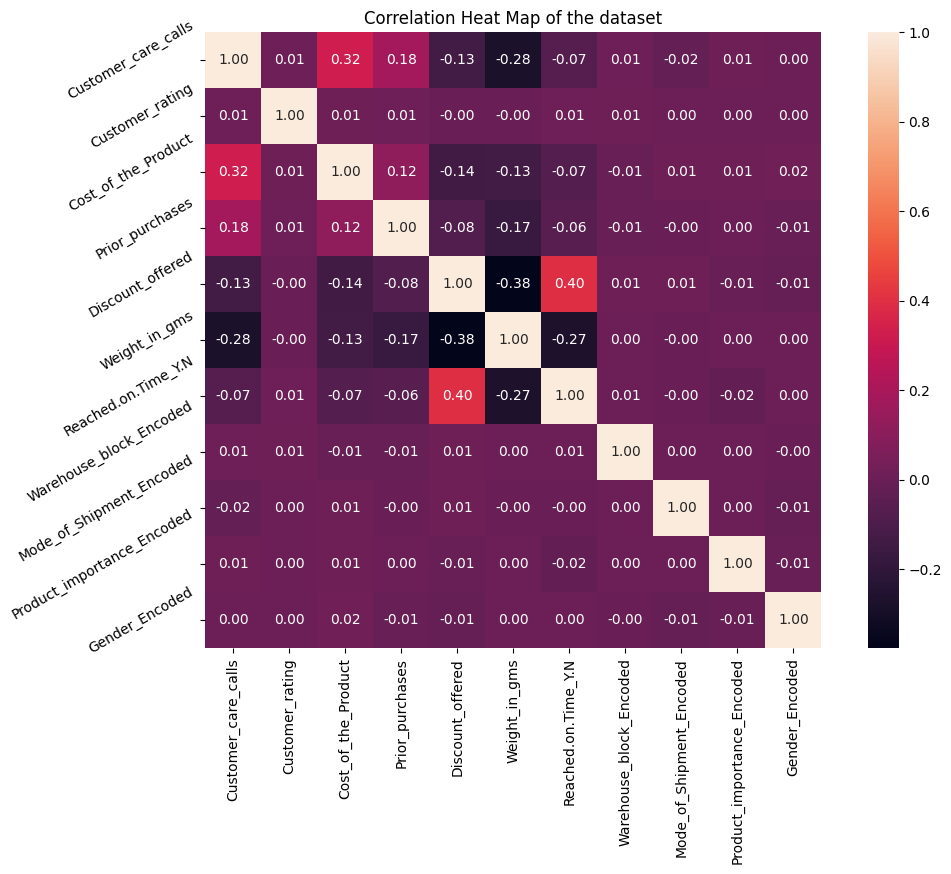

In [21]:
# Correlation Heat Map

import seaborn as sns

plt.figure(figsize=(12, 8)) 
plt.title('Correlation Heat Map of the dataset')

a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)

plt.show()

# Declare feature vector and target variable

In [26]:
X = data.drop(['Reached.on.Time_Y.N', 'Discount_offered', 'Customer_care_calls', 'Customer_rating', 'Weight_in_gms'], axis=1)
print(X)

y = data['Customer_care_calls']

       Cost_of_the_Product  Prior_purchases  Warehouse_block_Encoded  \
0                      177                3                        3   
1                      216                2                        4   
2                      183                4                        0   
3                      176                4                        1   
4                      184                3                        2   
...                    ...              ...                      ...   
10994                  252                5                        0   
10995                  232                5                        1   
10996                  242                5                        2   
10997                  223                6                        4   
10998                  155                5                        3   

       Mode_of_Shipment_Encoded  Product_importance_Encoded  Gender_Encoded  
0                             0                          

# Split data into separate training and test set

In [28]:
from sklearn.model_selection import train_test_split

# Random state is set to 0 to ensure that the data is split in the same way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
X_train.shape, X_test.shape

((8799, 6), (2200, 6))

In [30]:
# Feature Engineering

X_train.dtypes

Cost_of_the_Product           int64
Prior_purchases               int64
Warehouse_block_Encoded       int64
Mode_of_Shipment_Encoded      int64
Product_importance_Encoded    int64
Gender_Encoded                int64
dtype: object

In [31]:
# Check missing values in numerical variables in X_train

X_train.isnull().sum()

Cost_of_the_Product           0
Prior_purchases               0
Warehouse_block_Encoded       0
Mode_of_Shipment_Encoded      0
Product_importance_Encoded    0
Gender_Encoded                0
dtype: int64

In [32]:
X_train.head()

,Cost_of_the_Product,Prior_purchases,Warehouse_block_Encoded,Mode_of_Shipment_Encoded,Product_importance_Encoded,Gender_Encoded
8965,178,3,4,2,1,0
5936,202,4,0,2,2,0
10656,277,3,3,2,2,1
3328,219,2,2,2,2,1
9880,296,4,2,0,1,0


In [33]:
X_test.head()

,Cost_of_the_Product,Prior_purchases,Warehouse_block_Encoded,Mode_of_Shipment_Encoded,Product_importance_Encoded,Gender_Encoded
107,216,3,4,2,0,1
5594,220,3,0,1,1,0
6997,215,4,4,0,1,0
3984,160,5,3,0,1,0
3111,229,2,1,2,2,0


In [34]:
# Feature Scaling

cols = X_train.columns

In [35]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [37]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [38]:
X_train.head()

,Cost_of_the_Product,Prior_purchases,Warehouse_block_Encoded,Mode_of_Shipment_Encoded,Product_importance_Encoded,Gender_Encoded
0,-0.670120,-0.378680,1.118207,0.636561,-0.548137,-1.001706
1,-0.173246,0.273631,-1.568422,0.636561,1.037874,-1.001706
2,1.379486,-0.378680,0.446550,0.636561,1.037874,0.998297
3,0.178707,-1.030992,-0.225107,0.636561,1.037874,0.998297
4,1.772845,0.273631,-0.225107,-2.004223,-0.548137,-1.001706


In [39]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [i for i in range (8, 16)]
scores = []

for k in k_values:
  print("Training with k = ", k)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

Training with k =  8
Training with k =  9
Training with k =  10
Training with k =  11
Training with k =  12
Training with k =  13
Training with k =  14
Training with k =  15


Text(0, 0.5, 'Accuracy Score')

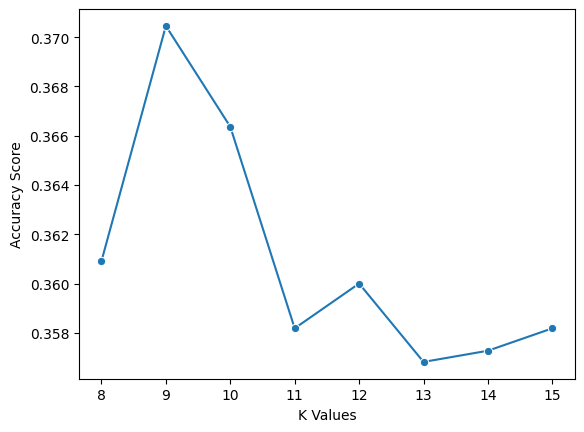

In [40]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [41]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [42]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.3704545454545455
Precision: 0.3704545454545455
Recall: 0.3704545454545455


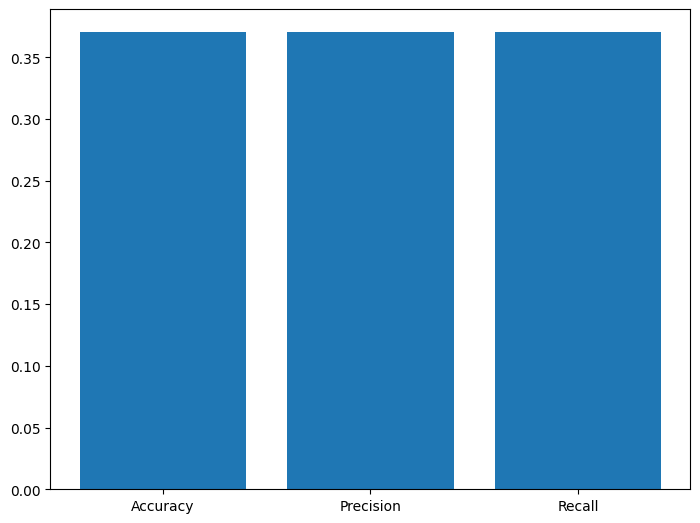

In [44]:
# Create diagram batang untuk menampilkan hasil akurasi, presisi, dan recall
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]
ax.bar(metrics, scores)

plt.show()
